Student Name: Jomy Mathew

# Penguin Classification Analysis

Dataset used: penguins_size.csv

In [36]:
# Load dataset using Pandas library
import pandas as pd
data = pd.read_csv("penguins_size.csv")

In [37]:
# first 5 rows in the dataset
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [38]:
# last 5 rows in the dataset
data.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


## Shape of dataset

In [39]:
# shape of dataset (number of rows and columns)
data.shape

(344, 7)

## Checking for missing values

In [40]:
# checking for missing values
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

## Handing Missing values

1. Replacing NA values in 'sex' column with the mode

In [41]:
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

In [42]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

2. Droping NA values in remaining columns

In [43]:
data = data.dropna()

In [44]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

3. Droping the '.' value in 'Sex' column

In [45]:
data['sex'].value_counts()

MALE      176
FEMALE    165
.           1
Name: sex, dtype: int64

Here, we could see that gender column has 3 unique values: 'MALE', 'FEMALE', and '.'.

In [46]:
data = data[data['sex'] != '.']

In [47]:
data['sex'].value_counts()

MALE      176
FEMALE    165
Name: sex, dtype: int64

In [48]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [49]:
data.shape

(341, 7)

## Checking for Outliers

<Axes: xlabel='flipper_length_mm'>

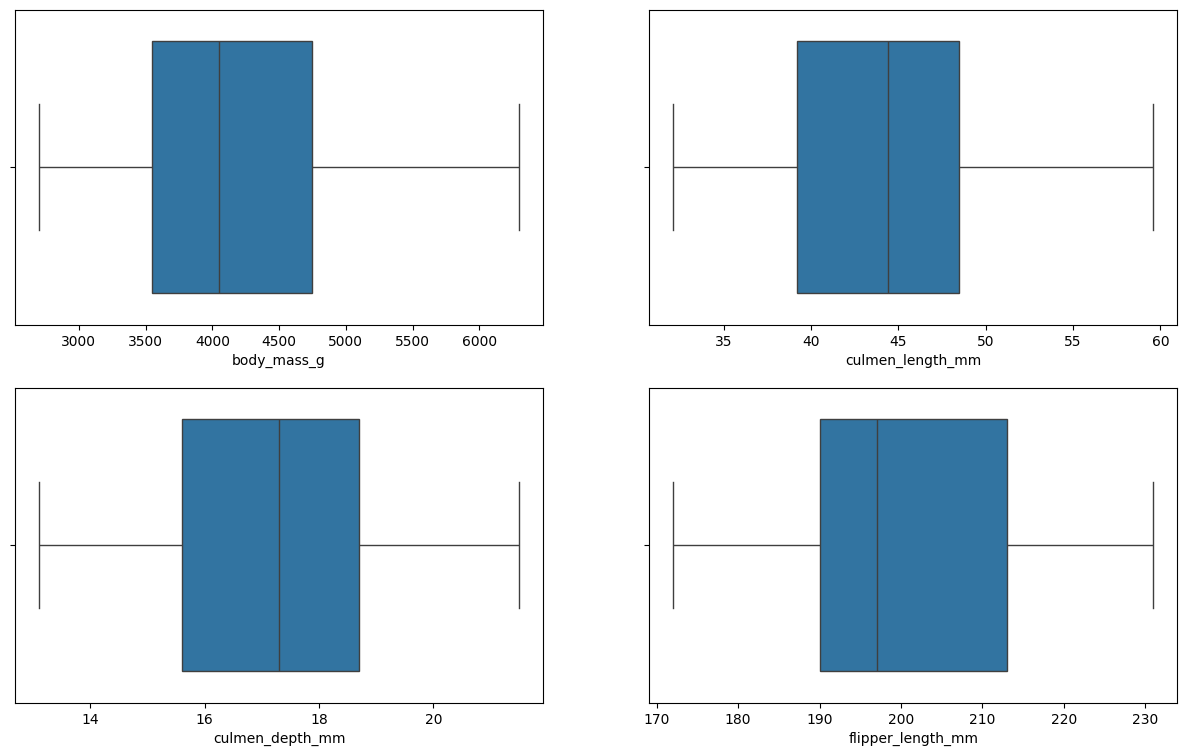

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 9))
plt.subplot(2,2,1)
sns.boxplot(x=data['body_mass_g'])

plt.subplot(2,2,2)
sns.boxplot(x=data['culmen_length_mm'])

plt.subplot(2,2,3)
sns.boxplot(x=data['culmen_depth_mm'])

plt.subplot(2,2,4)
sns.boxplot(x=data['flipper_length_mm'])

We could see that there are no outliers present in the dataset.

## Visualization

### Univariate Analysis

In [51]:
data['species'].value_counts()

Adelie       151
Gentoo       122
Chinstrap     68
Name: species, dtype: int64

Text(0.5, 1.0, 'Number of Species')

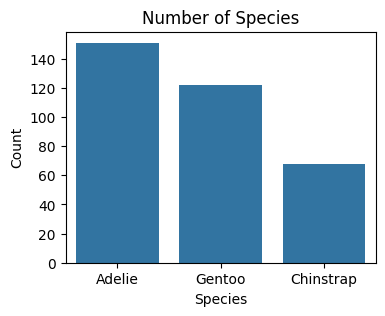

In [52]:
# Count of Species
import seaborn as sns
species = data['species'].value_counts()

plt.figure(figsize=(4, 3))
sns.barplot(x=species.index, y=species.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Number of Species')

Text(0.5, 1.0, 'Number of Island')

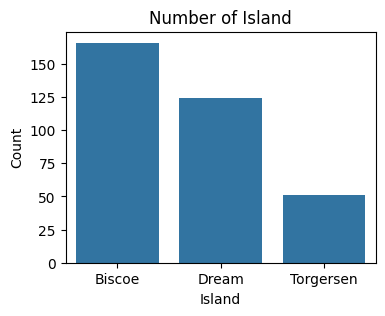

In [53]:
# Count of Species
import seaborn as sns
island = data['island'].value_counts()

plt.figure(figsize=(4, 3))
sns.barplot(x=island.index, y=island.values)
plt.xlabel('Island')
plt.ylabel('Count')
plt.title('Number of Island')

Text(0.5, 1.0, 'Count of Genders')

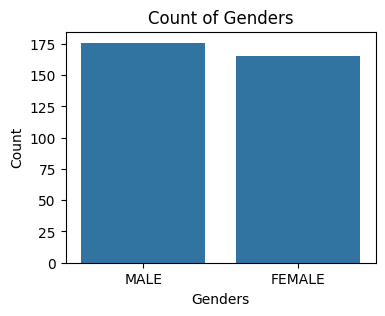

In [54]:
# Count of Species
import seaborn as sns
sex = data['sex'].value_counts()

plt.figure(figsize=(4, 3))
sns.barplot(x=sex.index, y=sex.values)
plt.xlabel('Genders')
plt.ylabel('Count')
plt.title('Count of Genders')

### Bi-Variate Analysis

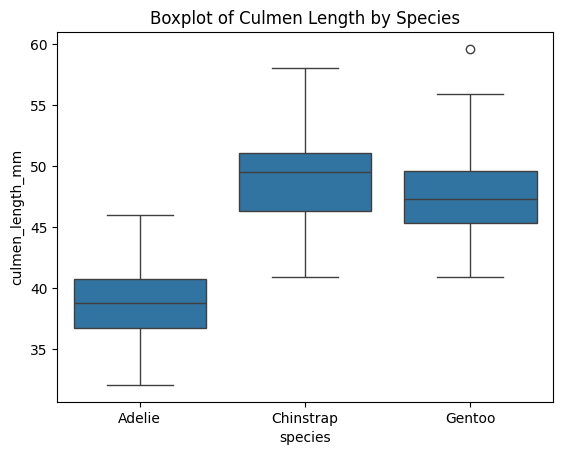

In [55]:
# Boxplot of culmen length by species
sns.boxplot(x='species', y='culmen_length_mm', data=data)
plt.title('Boxplot of Culmen Length by Species')
plt.show()

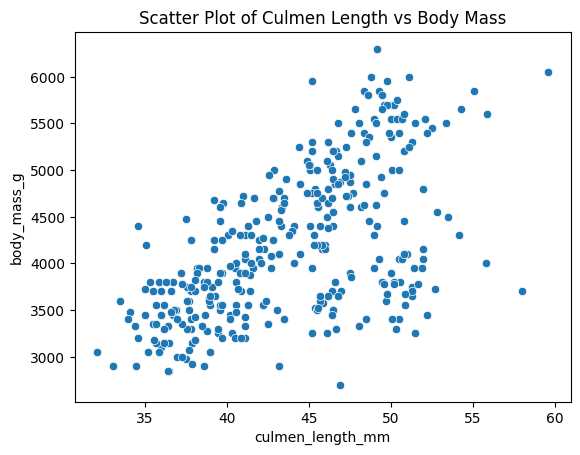

In [56]:
# Scatter plot of culmen length against body mass
sns.scatterplot(x='culmen_length_mm', y='body_mass_g', data=data)
plt.title('Scatter Plot of Culmen Length vs Body Mass')
plt.show()


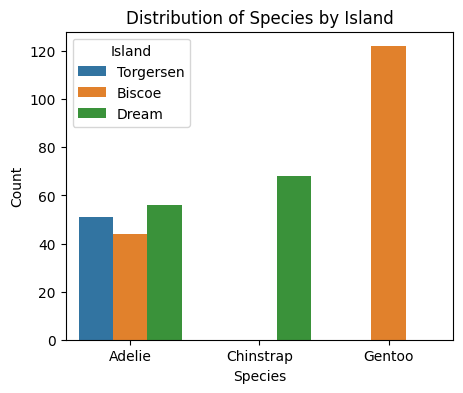

In [57]:
#distrubution of species by island
plt.figure(figsize=(5, 4))

sns.countplot(x='species', hue='island', data=data)
plt.title('Distribution of Species by Island')
plt.xlabel('Species')
plt.ylabel('Count')

plt.legend(title='Island')
plt.show()

### Multi-Variate Analysis

In [58]:
correlation_matrix = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
correlation_matrix

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235015,0.657102,0.595476
culmen_depth_mm,-0.235015,1.000000,-0.582964,-0.470963
flipper_length_mm,0.657102,-0.582964,1.000000,0.870956
body_mass_g,0.595476,-0.470963,0.870956,1.000000


<Axes: >

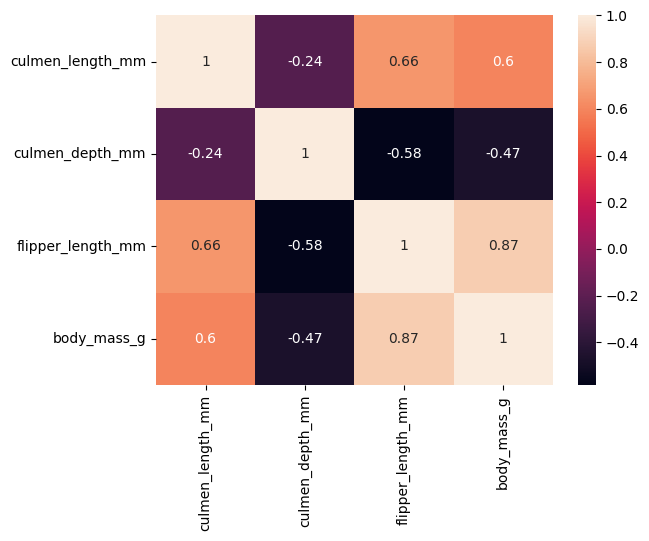

In [59]:
sns.heatmap(correlation_matrix, annot=True)

## Descriptive Statistics

In [60]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,341.000000,341.000000,341.000000,341.000000
mean,43.920235,17.155425,200.868035,4199.780059
std,5.467516,1.976124,14.055255,802.300201
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.400000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Encoding of 'Species' Column

In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Encoded_Island'] = label_encoder.fit_transform(data['island'])

In [62]:
data['Sex'] = label_encoder.fit_transform(data['sex'])
data.drop('sex', axis=1, inplace=True)

In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Target'] = label_encoder.fit_transform(data['species'])

In [64]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Encoded_Island,Sex,Target
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2,1,0


In [65]:
d0 = data[data.Target==0]
d1 = data[data.Target==1]
d2 = data[data.Target==2]

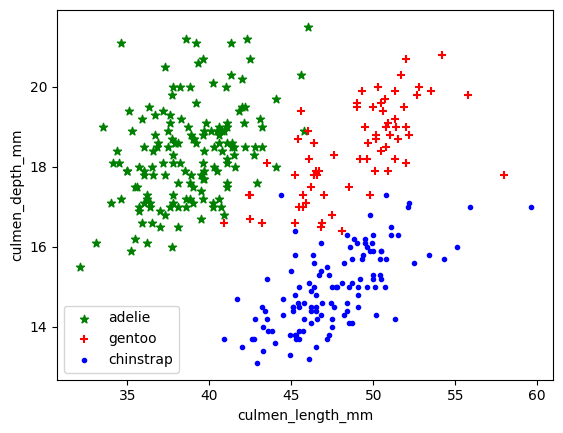

In [66]:
import matplotlib.pyplot as plt
plt.scatter(d0['culmen_length_mm'], d0['culmen_depth_mm'], marker='*', color='green')
plt.scatter(d1['culmen_length_mm'], d1['culmen_depth_mm'], marker='+', color='red')
plt.scatter(d2['culmen_length_mm'], d2['culmen_depth_mm'], marker='.', color='blue')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.legend(['adelie', 'gentoo', 'chinstrap'])

## Spliting dataset (Dependent & Independent)

In [67]:
x = data.iloc[:,2:8]
y = data.iloc[:,-1]

In [68]:
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Encoded_Island,Sex
0,39.1,18.7,181.0,3750.0,2,1
1,39.5,17.4,186.0,3800.0,2,0
2,40.3,18.0,195.0,3250.0,2,0
4,36.7,19.3,193.0,3450.0,2,0
5,39.3,20.6,190.0,3650.0,2,1
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0
340,46.8,14.3,215.0,4850.0,0,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,0,0


In [69]:
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: Target, Length: 341, dtype: int64

## Scaling the data

In [70]:
from sklearn.preprocessing import StandardScaler

# Standard Scaling
scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(x)

print("\nStandard Scaled Data:")
print(X_scaled_standard[:5])



Standard Scaled Data:
[[-0.88290872  0.78276694 -1.41564362 -0.561437    1.84975018  0.96824584]
 [-0.80964185  0.12394677 -1.05938201 -0.4990246   1.84975018 -1.03279556]
 [-0.66310812  0.42801762 -0.41811113 -1.18556092  1.84975018 -1.03279556]
 [-1.32250992  1.08683779 -0.56061577 -0.93591135  1.84975018 -1.03279556]
 [-0.84627529  1.74565797 -0.77437273 -0.68626178  1.84975018  0.96824584]]


## Spliting the dataset (Train and Test)

In [112]:
#Split data into train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [113]:
print(x_train.shape)
print(y_train.shape)

(238, 6)
(238,)


In [114]:
print(x_test.shape)
print(y_test.shape)

(103, 6)
(103,)


## Building the model (SVM & Decision Tree Classifier)

### Support Vector Machine (SVM)

In [115]:
# SVM is a model from sklearn library
from sklearn.svm import SVC

In [116]:
# Initializing SVM
model = SVC(kernel="linear")

In [117]:
# Training model
MSVC = model.fit(x_train,y_train)

In [118]:
# Testing model
pred = MSVC.predict(x_test)

In [119]:
# Evaluating model performance
from sklearn import metrics
metrics.accuracy_score(pred,y_test)

0.9902912621359223

In [120]:
cr = metrics.classification_report(pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        34

    accuracy                           0.99       103
   macro avg       0.98      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



Support Vector Machine (SVM) has 0.99 percent accuracy for the given dataset.

### Decision Tree Classifier

In [121]:
#Create Model
from sklearn.tree import DecisionTreeClassifier

In [122]:
df=DecisionTreeClassifier(criterion='entropy',random_state=2)

In [123]:
df.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

In [124]:
pred=df.predict(x_test)

In [125]:
# Evaluating model performance
from sklearn import metrics
metrics.accuracy_score(pred,y_test)

0.970873786407767

In [126]:
cr = metrics.classification_report(pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.84      1.00      0.91        16
           2       1.00      1.00      1.00        34

    accuracy                           0.97       103
   macro avg       0.95      0.98      0.96       103
weighted avg       0.98      0.97      0.97       103



Decision Tree Classifier has 0.97 percent accuracy for the given dataset.

Here, we can conclude that Support Vector Machine (SVM) has the best accuracy as compared to Decision Tree Classifier.
Support Vector Machine (SVM) is suitable for predicting this type of dataset.